In [1]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
keras.__version__

'2.4.0'

In [4]:
data = pd.read_csv('datasets/insurance.csv')

data.sample(10)

,age,sex,bmi,children,smoker,region,charges
923,34,male,35.815,0,no,northwest,4320.41085
435,60,male,33.110,3,no,southeast,13919.82290
1050,44,female,36.955,1,no,northwest,8023.13545
731,53,male,21.400,1,no,southwest,10065.41300
48,60,female,24.530,0,no,southeast,12629.89670
1182,25,female,30.300,0,no,southwest,2632.99200
201,48,female,32.230,1,no,southeast,8871.15170
1039,19,male,27.265,2,no,northwest,22493.65964
1162,30,male,38.830,1,no,southeast,18963.17192
606,27,female,25.175,0,no,northeast,3558.62025


In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data[['age', 'bmi', 'charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

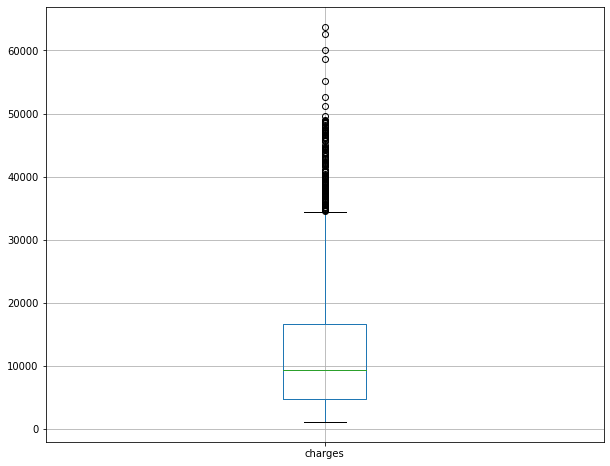

In [11]:
plt.figure(figsize=(10, 8))

data.boxplot('charges')

plt.show()

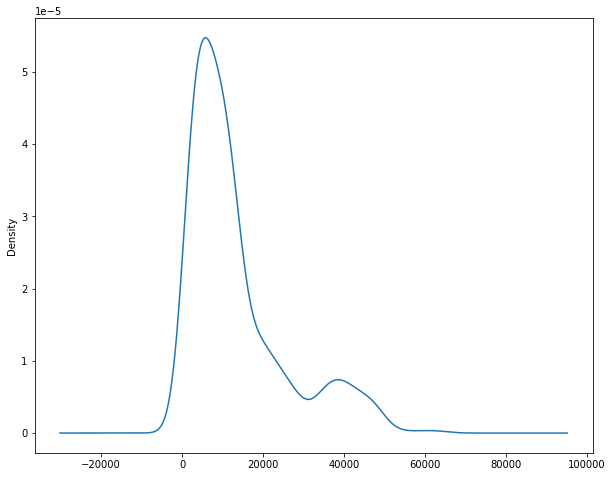

In [12]:
plt.figure(figsize=(10, 8))

data['charges'].plot.kde()

plt.show()

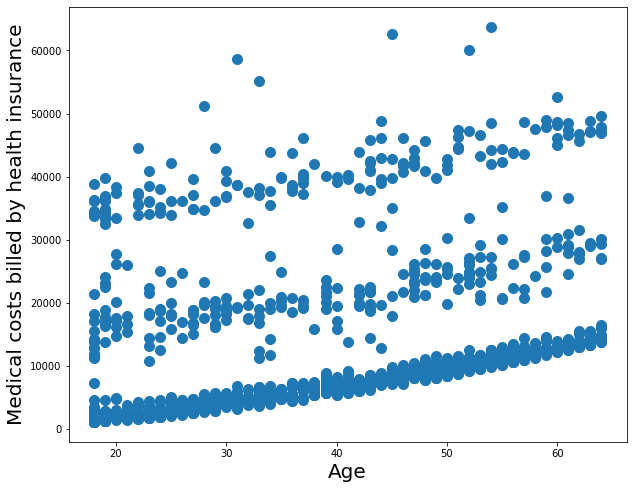

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(data['age'], data['charges'], s=100)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

In [14]:
features = data.drop('charges', axis = 1)

target = data[['charges']]

In [15]:
categorical_features = features[['sex', 'smoker', 'region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [16]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1)

numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [17]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [18]:
smoker_dict = {'no':0, 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [19]:
categorical_features = pd.get_dummies(categorical_features, columns=['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [20]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


In [21]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.805565e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
bmi,1338.0,-2.124194e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,-5.576008e-17,1.000374,-0.908614,-0.908614,-0.078767,0.751079,3.240619


In [22]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [23]:
processed_data = pd.concat([processed_features, target], axis=1, sort=False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [24]:
processed_data.to_csv('datasets/insurance_processed.csv', index=False)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [26]:
x_train.shape, y_train.shape

((1070, 9), (1070, 1))

In [28]:
x_test.shape, y_test.shape

((268, 9), (268, 1))

In [29]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [30]:
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


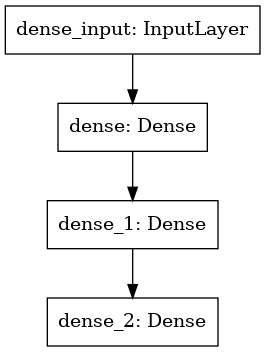

In [33]:
keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

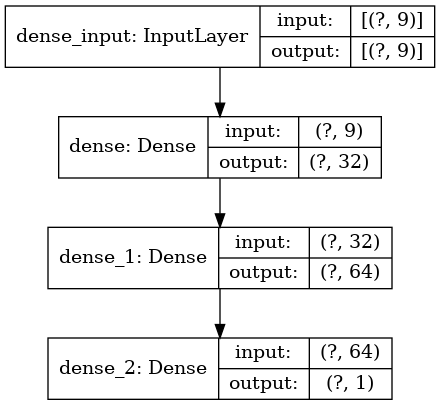

In [35]:
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

In [36]:
n_epochs = 1000

training_history = model_relu_64.fit(x_train,
                                     y_train,
                                     epochs=n_epochs,
                                     validation_split=0.2,
                                     verbose=True)

poch 901/1000
27/27 [==============================] - 0s 3ms/step - loss: 20458302.0000 - mae: 2654.4827 - mse: 20458302.0000 - val_loss: 21501098.0000 - val_mae: 2644.5427 - val_mse: 21501098.0000
Epoch 902/1000
27/27 [==============================] - 0s 3ms/step - loss: 20464142.0000 - mae: 2652.7915 - mse: 20464142.0000 - val_loss: 21510312.0000 - val_mae: 2645.0061 - val_mse: 21510312.0000
Epoch 903/1000
27/27 [==============================] - 0s 3ms/step - loss: 20468948.0000 - mae: 2670.2788 - mse: 20468948.0000 - val_loss: 21549808.0000 - val_mae: 2663.1196 - val_mse: 21549808.0000
Epoch 904/1000
27/27 [==============================] - 0s 3ms/step - loss: 20450132.0000 - mae: 2638.9209 - mse: 20450132.0000 - val_loss: 21455590.0000 - val_mae: 2631.6472 - val_mse: 21455590.0000
Epoch 905/1000
27/27 [==============================] - 0s 3ms/step - loss: 20459298.0000 - mae: 2648.9690 - mse: 20459298.0000 - val_loss: 21456538.0000 - val_mae: 2634.6082 - val_mse: 21456538.0000
E

In [37]:
training_history_df = pd.DataFrame(training_history.history)

training_history_df['epoch'] = training_history.epoch

training_history_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20315254.0,2670.020996,20315254.0,21386920.0,2663.514404,21386920.0,995
996,20296776.0,2627.830811,20296776.0,21267068.0,2616.553223,21267068.0,996
997,20292154.0,2611.858154,20292154.0,21295038.0,2628.668213,21295038.0,997
998,20289870.0,2638.862061,20289870.0,21361940.0,2662.275879,21361940.0,998
999,20302152.0,2669.969238,20302152.0,21349884.0,2650.741455,21349884.0,999


In [38]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

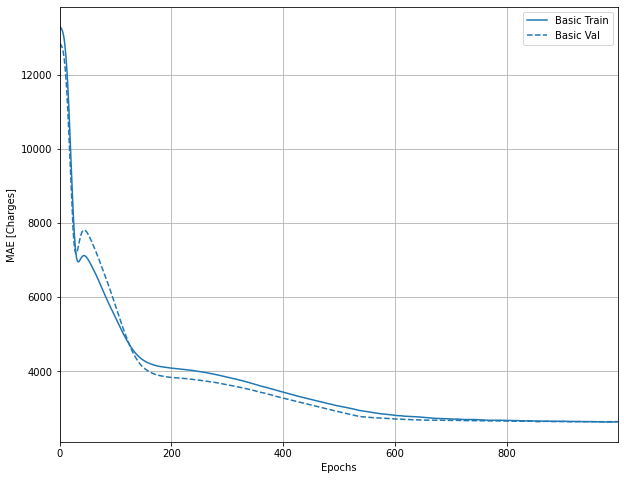

In [39]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_history}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

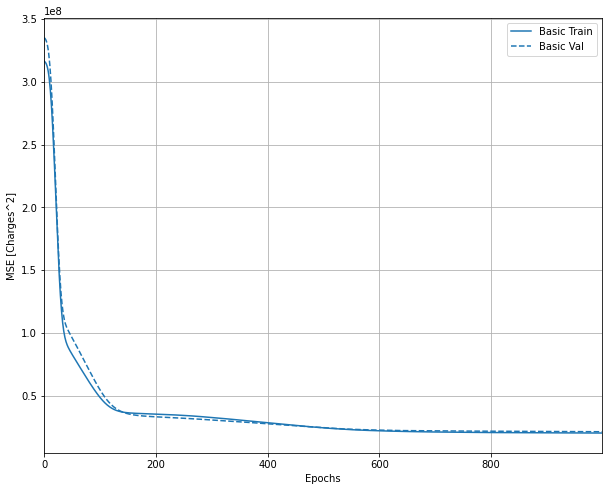

In [40]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_history}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

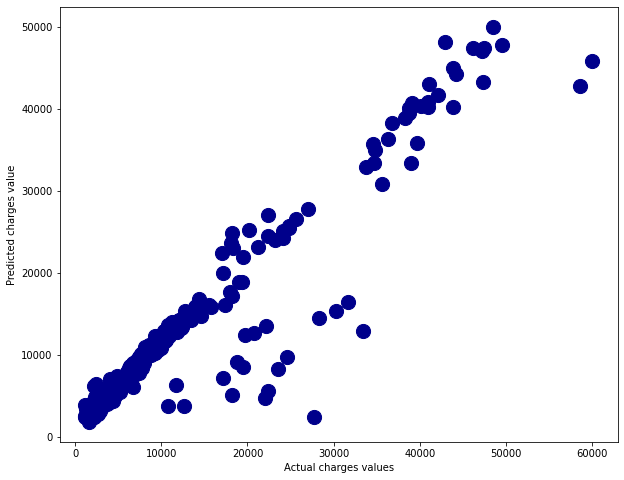

In [46]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges value')
plt.show()

In [47]:
r2_score(y_test, y_pred)

0.876525865118774

In [48]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [49]:
model_elu_64 = build_model()

model_elu_64.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


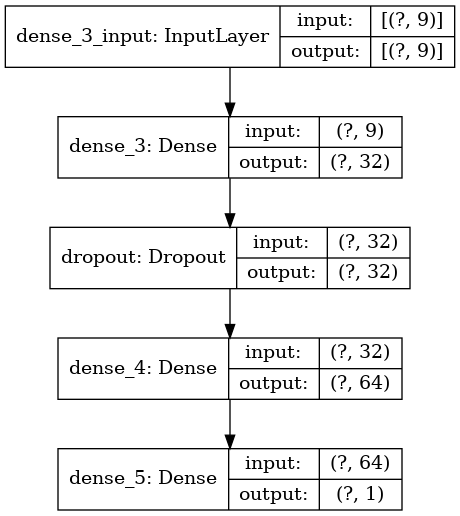

In [50]:
keras.utils.plot_model(model_elu_64, 'model_elu_64_shapes.png', show_shapes=True)

In [51]:
training_history = model_elu_64.fit(x_train,
                                    y_train,
                                    epochs=n_epochs,
                                    validation_split=0.2,
                                    verbose=False,
                                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317054560.0000,  mae:13317.5752,  mse:317054560.0000,  val_loss:336091008.0000,  val_mae:12876.7100,  val_mse:336091008.0000,  
....................................................................................................
Epoch: 100, loss:39553708.0000,  mae:4513.1089,  mse:39553708.0000,  val_loss:38311444.0000,  val_mae:4474.4878,  val_mse:38311444.0000,  
....................................................................................................
Epoch: 200, loss:30788282.0000,  mae:3687.3542,  mse:30788282.0000,  val_loss:24636656.0000,  val_mae:3076.9722,  val_mse:24636656.0000,  
....................................................................................................
Epoch: 300, loss:30605938.0000,  mae:3789.4565,  mse:30605938.0000,  val_loss:23976672.0000,  val_mae:2937.1248,  val_mse:23976672.0000,  
....................................................................................................
Epoch: 400, loss:29506092.0000,  ma

In [52]:
training_history_df = pd.DataFrame(training_history.history)

training_history_df['epoch'] = training_history.epoch

training_history_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,27507332.0,3428.165283,27507332.0,22541750.0,2743.232422,22541752.0,995
996,27998562.0,3429.887451,27998562.0,22512360.0,2692.698486,22512360.0,996
997,29819908.0,3424.775879,29819908.0,22514324.0,2697.058350,22514324.0,997
998,29360564.0,3514.483398,29360564.0,22545058.0,2711.201416,22545058.0,998
999,27722580.0,3462.886719,27722580.0,22570942.0,2738.471191,22570942.0,999


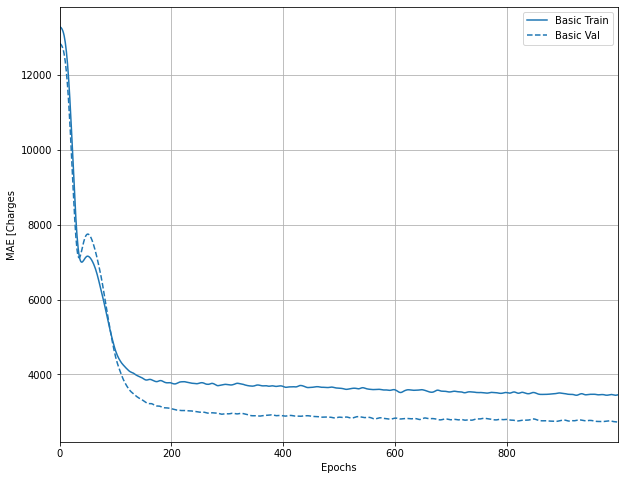

In [53]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_history}, metric = "mae")

plt.ylabel('MAE [Charges')
plt.show()

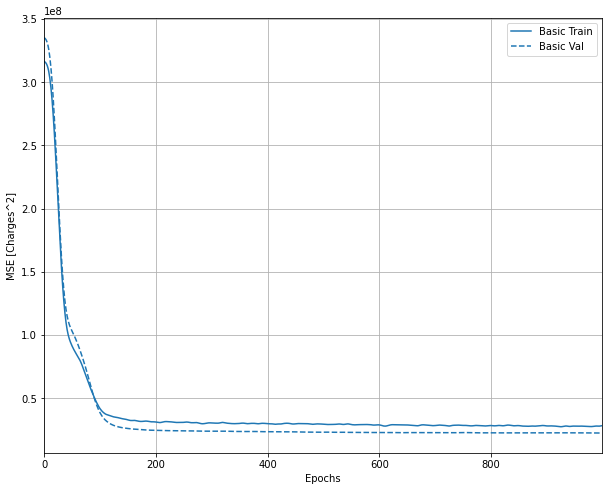

In [54]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_history}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

In [55]:
model_elu_64.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 21596064.0000 - mae: 2817.4749 - mse: 21596064.0000


[21596064.0, 2817.474853515625, 21596064.0]

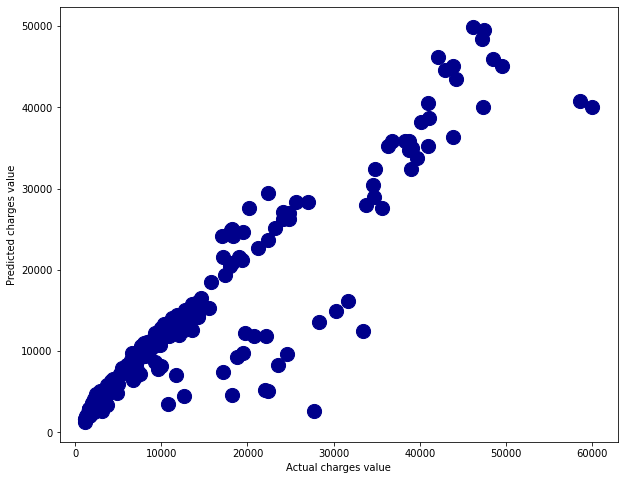

In [56]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges value')
plt.ylabel('Predicted charges value')
plt.show()

In [57]:
r2_score(y_test, y_pred)

0.8553324481161373

In [58]:
model_relu_with_ES = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_history = model_relu_with_ES.fit(x_train,
                                          y_train,
                                          epochs=n_epochs,
                                          validation_split=0.2,
                                          verbose=False,
                                          callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317051744.0000,  mae:13317.7041,  mse:317051744.0000,  val_loss:336084768.0000,  val_mae:12876.8809,  val_mse:336084768.0000,  
....................................................................................................
Epoch: 100, loss:38496140.0000,  mae:4465.3101,  mse:38496140.0000,  val_loss:36008212.0000,  val_mae:4299.6406,  val_mse:36008212.0000,  
................................................................................................

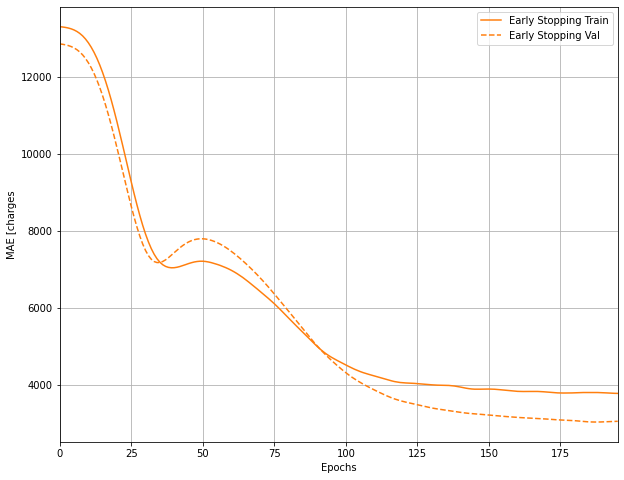

In [59]:
plt.figure(figsize=(10, 8))

plotter.plot({'Early Stopping': training_history}, metric = "mae")

plt.ylabel('MAE [charges')
plt.show()

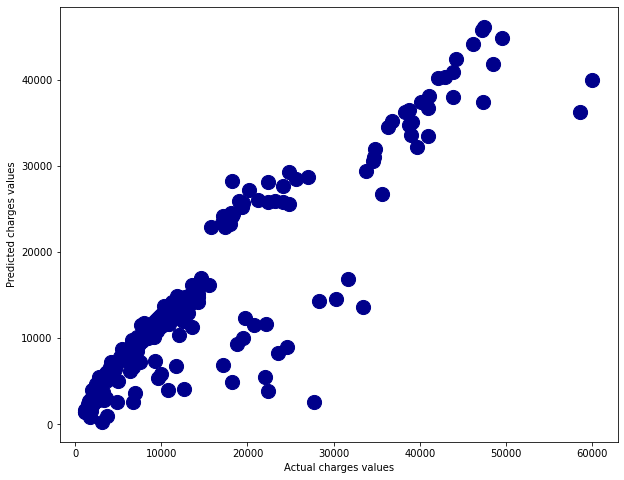

In [60]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [61]:
r2_score(y_test, y_pred)

0.8359147441645052

In [62]:
model_relu_with_ES.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights")

In [64]:
!ls my_models/

checkpoint  relu_64_weights.data-00000-of-00001  relu_64_weights.index


In [65]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights.h5", save_format="h5")

In [66]:
!ls my_models/

checkpoint			     relu_64_weights.h5
relu_64_weights.data-00000-of-00001  relu_64_weights.index


In [67]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_6_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_c

In [68]:
with open('./my_models/relu_64_config.json', 'w') as outfile:
    outfile.write(relu_64_json)

In [69]:
!ls my_models/

checkpoint	     relu_64_weights.data-00000-of-00001  relu_64_weights.index
relu_64_config.json  relu_64_weights.h5


In [70]:
model_relu_with_ES.save("./my_models/relu_64_config_weights")

INFO:tensorflow:Assets written to: ./my_models/relu_64_config_weights/assets
